<a href="https://colab.research.google.com/github/VienneseWaltz/Uber-Analysis/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar



In [2]:
# Read in the Uber drives dataset
uber_dataset = pd.read_csv('/content/Uber Drives - .csv')


In [3]:
uber_dataset.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
# Check for missing values in our dataset
uber_dataset.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
# How many of each type of null values?
uber_dataset.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
# We see that END_DATE*, CATEGORY*, START*, STOP* all have 1 NaN value whereas PURPOSE* column has 503 NaN values. Not a surprise
# there, as many passengers may not state the purpose of their rides. 


In [7]:
# Dropping the NaN values [Not a move we advocate but for now, we'll do it.] 

In [8]:
uber_dataset = uber_dataset.dropna()

In [9]:
# Let's check if we have any more NaN values in the dataset
uber_dataset.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [10]:
# Now we can see that there isn't any NaN values in the dataset.

In [11]:
# Check the datatypes of uber_dataset.
uber_dataset.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [12]:
# We can see that START_DATE* and END_DATE* are of object types. We need to convert values of these 2 columns to a 
# datetime type
uber_dataset['START_DATE*'] = pd.to_datetime(uber_dataset['START_DATE*'], format="%m/%d/%Y %H:%M")
uber_dataset['END_DATE*'] = pd.to_datetime(uber_dataset['END_DATE*'], format="%m/%d/%Y %H:%M")

In [13]:
uber_dataset

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [14]:
uber_dataset.dtypes


START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [15]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in uber_dataset['START_DATE*']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

uber_dataset['HOUR'] = hour
uber_dataset['DAY'] = day
uber_dataset['DAY_OF_THE_WEEK'] = dayofweek
uber_dataset['MONTH'] = month
uber_dataset['WEEKDAY'] = weekday

In [16]:
uber_dataset.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_THE_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [17]:
# Let's check the categories we have - whether the customers are riding on Uber on business or personal
uber_dataset['CATEGORY*'].value_counts()

# Under 'CATEGORY*', 647 customers are those who ride on business and 6 are on personal


Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

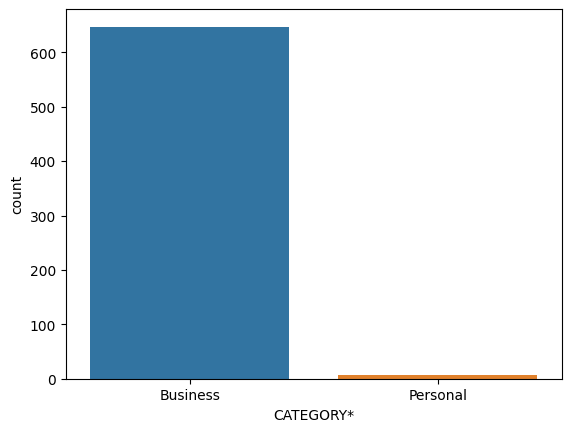

In [18]:
# Visualize using seaborn plot
sns.countplot(x = 'CATEGORY*', data = uber_dataset)

<Axes: ylabel='Frequency'>

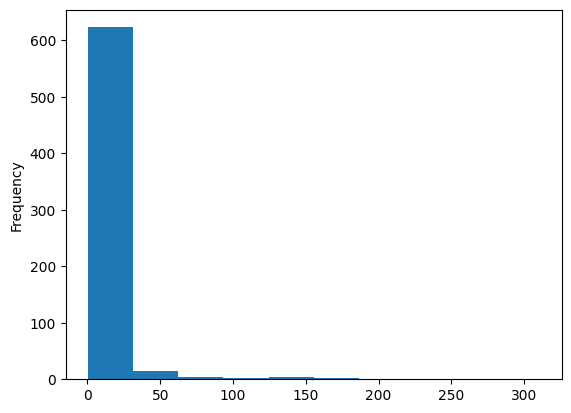

In [19]:
# How long do people travel with Uber?
uber_dataset['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of Trips vs. Hours')

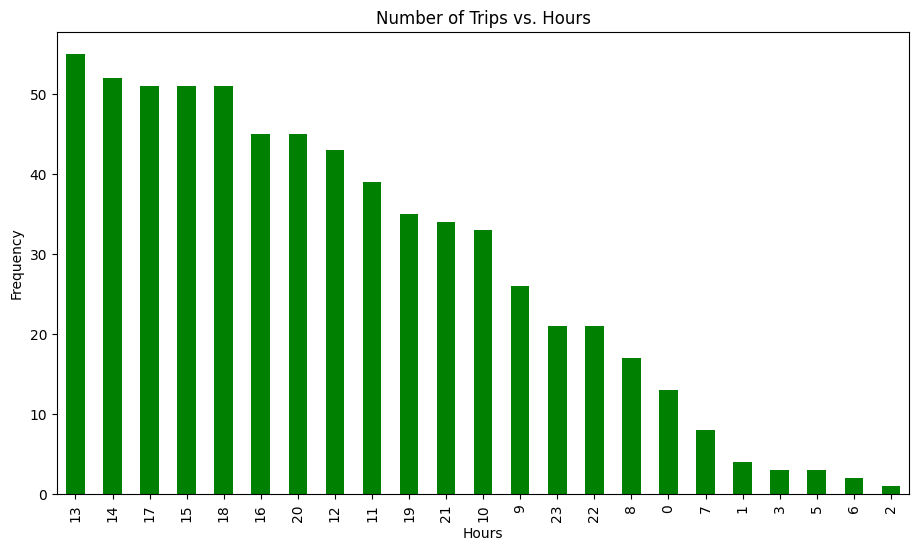

In [20]:
# What Hour Do Most People Take Uber To Their Destination?
hours = uber_dataset['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar', color = 'green', figsize=(11, 6))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs. Hours')

<Axes: >

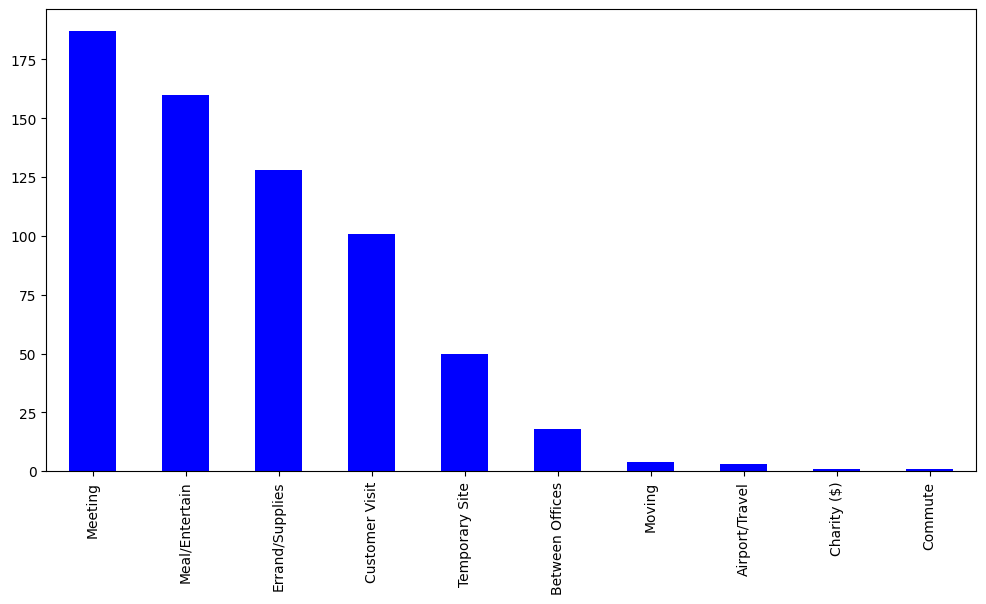

In [ ]:
# Check the purpose of the trips
uber_dataset['PURPOSE*'].value_counts().plot(kind='bar', figsize=(12, 6), color='blue')


<Axes: >

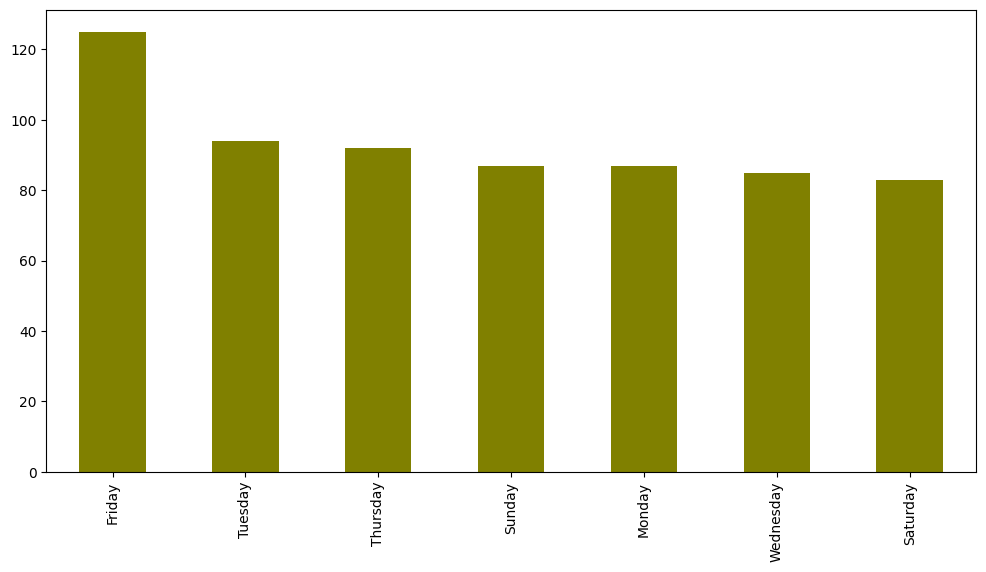

In [ ]:
# Which day has the highest number of trips?
uber_dataset['WEEKDAY'].value_counts().plot(kind='bar', figsize=(12, 6), color='olive')
# The plot shows that Friday has the highest number of trips, followed by Tuesday, Thursday and Sunday.


<Axes: >

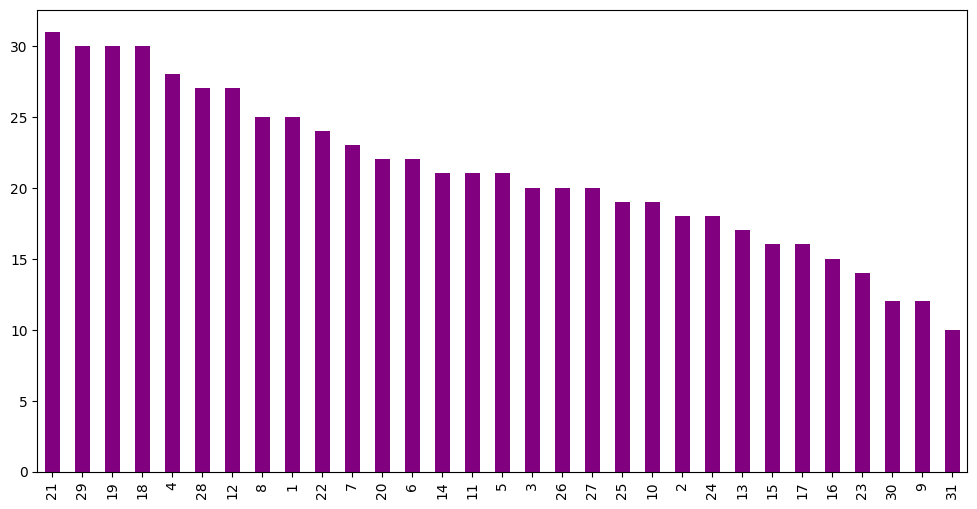

In [ ]:
# Number of trips each day
uber_dataset['DAY'].value_counts().plot(kind='bar', figsize=(12,6), color='purple')
# We see that the 21st day of the month, most people ride Uber, followed by the 18th/29th/19th.


<Axes: >

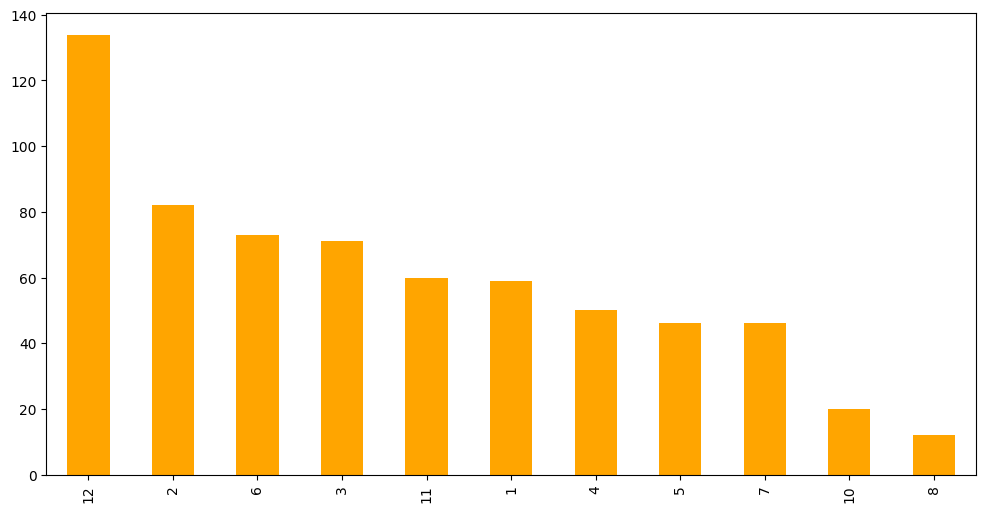

In [ ]:
# Number of trips each month of the year
uber_dataset['MONTH'].value_counts().plot(kind='bar', figsize=(12,6), color='orange')
# December has the most trips in a year

<Axes: >

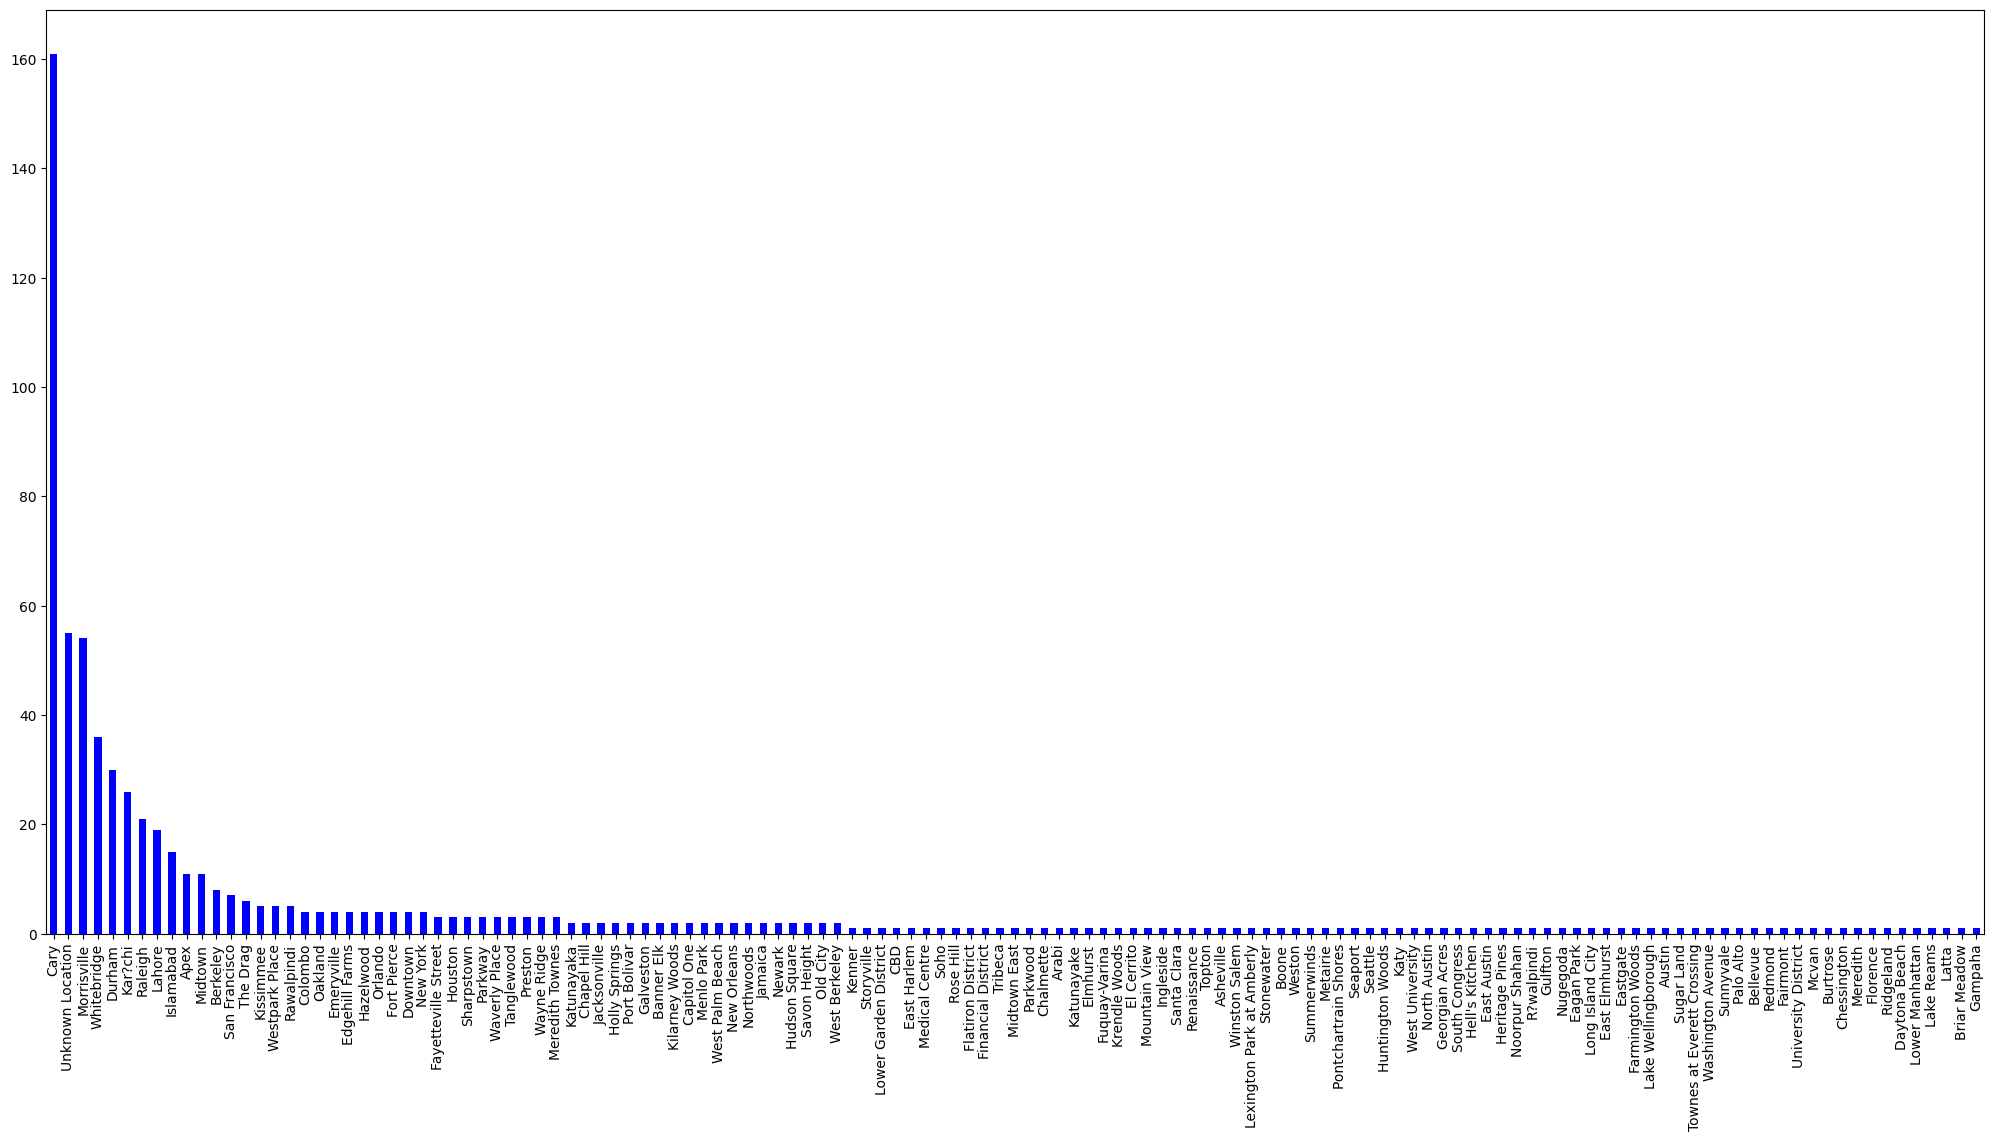

In [ ]:
# Where do most people start boarding from?
uber_dataset['START*'].value_counts().plot(kind='bar', figsize=(25,12), color='blue')
